In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statistics
import os
import os
print(os.listdir("C:/Users/ATIV/Desktop/pokemon"))

from subprocess import check_output
#print(check_output(["ls", "C:/Users/ATIV/Desktop/pokemon/"]).decode("utf8"))

df_pokemon = pd.read_csv('./pokemon.csv')
print (df_pokemon.shape)

['05.1_PCA.ipynb', 'cleanedpokemon', 'pokemon 변수.docx', 'pokemon.csv', 'pokemon.zip', 'pokemon_clean _update.xls', 'pokemon_clean.csv', 'pokemon_clean.xls', 'pokemon_edited.csv']
(801, 41)


## 데이터 분석 참조관련

# https://www.kaggle.com/jeru666/my-pokemon-collection?scriptVersionId=2624990 

## 데이터 확인

In [46]:
df_pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
df_pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

### Null 값 존재 확인

In [8]:
df_pokemon.isnull().values.any()

True

In [5]:
cols_missing_val = df_pokemon.columns[df_pokemon.isnull().any()].tolist()
print(cols_missing_val)

['height_m', 'type2', 'weight_kg']


In [6]:
for col in cols_missing_val:
    print("%s : %d" % (col, df_pokemon[col].isnull().sum())) ##이거 유용한듯 다른데에도 써먹어야지 

height_m : 20
type2 : 384
weight_kg : 20


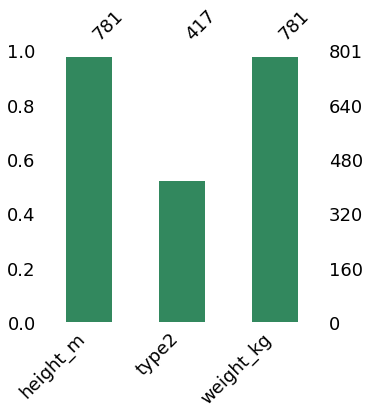

In [7]:
msno.bar(df_pokemon[cols_missing_val],figsize=(5,5),color="#32885e",fontsize=18,labels=True,)

## 전처리값 처리하기

In [9]:
# percentagae_male 전처리  
df_pokemon['percentage_male'].fillna(np.int(-1), inplace=True) 

In [10]:
#포켓몬의 typ2 전처리
df_pokemon['type2'].unique()

array(['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

In [11]:
#포멧몬 종류 2의 결측 값 'Nan' 로 대체하기
df_pokemon['type2'].fillna('Nan', inplace=True)

In [13]:
#포켓몬의 키와 몸무게 결측값 0으로 채우기
df_pokemon['height_m'].fillna(np.int(0), inplace=True)
df_pokemon['weight_kg'].fillna(np.int(0), inplace=True)

In [14]:
#최종으로 널값이 존재하는지 확인. 없네.
df_pokemon.isnull().values.any()

False

In [ ]:
# capture_rate 경우 값 하나가 string type이 있다.

In [144]:
df_pokemon['capture_rate'].replace('30 (Meteorite)255 (Core)', '500', inplace=True)
pd.to_numeric(df_pokemon['capture_rate'])
df_pokemon['capture_rate'] = df_pokemon['capture_rate'].astype(int)
df_pokemon.capture_rate.unique()

array([  45,  255,  120,  127,   90,  190,   75,  235,  150,   25,  170,
         50,  200,  100,  180,   60,  225,   30,   35,    3,   65,   70,
        125,  205,  155,  145,  130,  140,   15,  220,  160,   80,   55,
       1000], dtype=int64)

### Data 분석 시작

In [15]:
object_cols = list(df_pokemon.select_dtypes(include=['object']).columns)

In [16]:
df_pokemon = df_pokemon.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('Nan', np.nan)

In [10]:
df_pokemon['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [17]:
df_pokemon['type2'].unique()

array(['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

In [18]:
#--- Snippet to split pokemon based on whether they are of single type or dual type ---
single_type_pokemon = []
dual_type_pokemon = []

count = 0
for i in df_pokemon.index:
    if(pd.isnull(df_pokemon.type2[i]) == True):
    #if(df_pokemon.type2[i] == np.nan):
        count += 1
        single_type_pokemon.append(df_pokemon.name[i])
    else:
        dual_type_pokemon.append(df_pokemon.name[i])

print(len(dual_type_pokemon))
print(len(single_type_pokemon))
# dual type 417 마리 
# signle type 384마리 

417
384


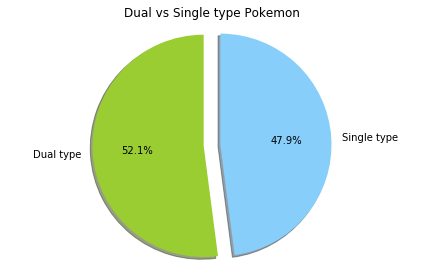

In [19]:
data = [417, 384]
colors = ['yellowgreen', 'lightskyblue']

# Create a pie chart
plt.pie(data, 
        labels= ['Dual type', 'Single type'], 
        shadow=True, 
        colors=colors, 
        explode=(0, 0.15), 
        startangle=90, 
        autopct='%1.1f%%')

# View the plot drop above
plt.axis('equal')
plt.title('Dual vs Single type Pokemon')
# View the plot
plt.tight_layout()
plt.show()

Text(0.5,1,'Type1')

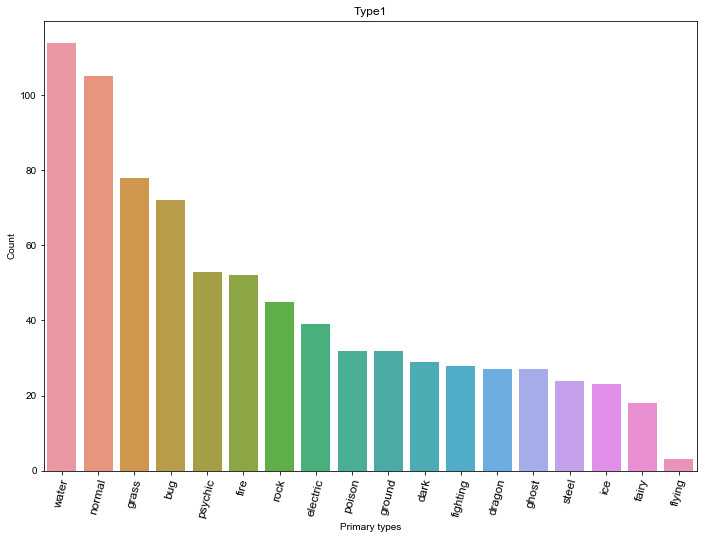

In [20]:
#Type1의 에대한 종류별 시각화

yy = pd.value_counts(df_pokemon['type1'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=yy.index, y=yy, data=df_pokemon)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Primary types', ylabel='Count')
ax.set_title('Type1')

In [20]:
ss = pd.value_counts(df_pokemon['type1'])
for i in range(0, 10):
    
    print ("{} : {} ".format(ss.index[i],  ss[i]))

water : 114 
normal : 105 
grass : 78 
bug : 72 
psychic : 53 
fire : 52 
rock : 45 
electric : 39 
poison : 32 
ground : 32 


Text(0.5,1,'포켓몬의')

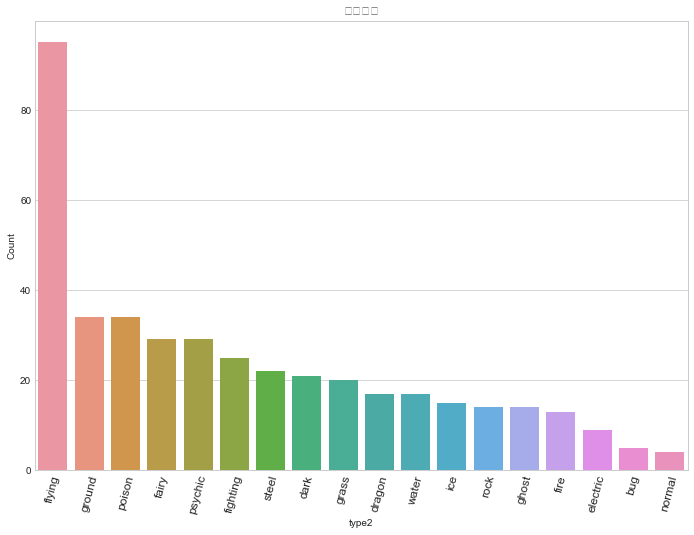

In [23]:
yy = pd.value_counts(df_pokemon['type2'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=yy.index, y=yy, data=df_pokemon)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='type2', ylabel='Count')
ax.set_title('포켓몬의')

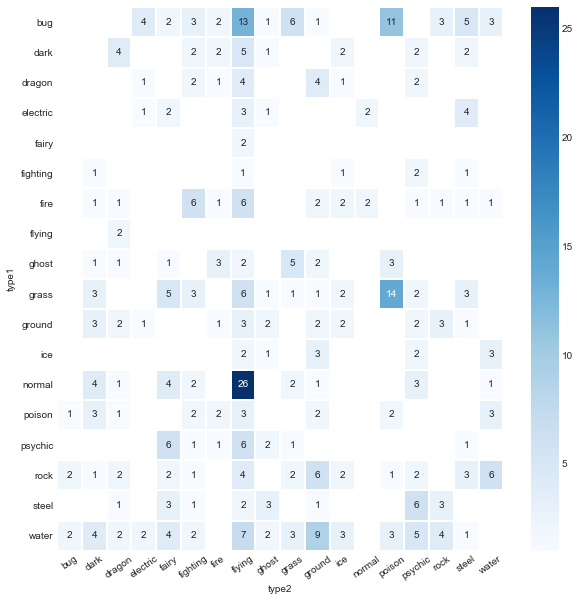

In [21]:
plt.subplots(figsize=(10, 10))

sns.heatmap(
    df_pokemon.groupby(['type1', 'type2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Blues"
)

plt.xticks(rotation=35)
plt.show()

### Classification

In [134]:
df_pokemon['classfication'].nunique()

588

In [135]:
ss = pd.value_counts(df_pokemon['classfication'])
for i in range(0, 10):
    
    print ("{} : {} ".format(ss.index[i],  ss[i]))

Dragon Pokémon : 8 
Mushroom Pokémon : 6 
Mouse Pokémon : 6 
Fairy Pokémon : 5 
Balloon Pokémon : 5 
Fox Pokémon : 5 
Flame Pokémon : 5 
Bagworm Pokémon : 4 
Cocoon Pokémon : 4 
Tadpole Pokémon : 4 


##  포켓몬의 성 분배율(percentage_male)

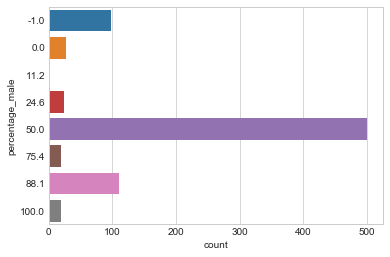

In [22]:
ax = sns.countplot(y=df_pokemon['percentage_male'], data=df_pokemon) 

# 100% - purely masculine. --> 100 남자
# 0% - purely feminine. 0이면 여자
# -1 - no gender. ---- 성이없음

In [27]:
print (' 남자 pokemon : ', len(df_pokemon[df_pokemon.percentage_male == 100.0]))
print (' 여자 pokemon : ', len(df_pokemon[df_pokemon.percentage_male == 0.0]))
print (' 성이 없는 pokemon : ', len(df_pokemon[df_pokemon.percentage_male == -1]))

print ('성별이 남자일 가능성이 큰 pokemon : ', len(df_pokemon[df_pokemon.percentage_male > 50.0]))
print ('성별이 여자일 가능성이 큰 pokemon', len(df_pokemon[(df_pokemon.percentage_male < 50.0) & (df_pokemon.percentage_male > -1.0)]))

print ('적절한 혼성비율  : ', len(df_pokemon[(df_pokemon.percentage_male < 100.0) & (df_pokemon.percentage_male > 0.0)]))

 남자 pokemon :  19
 여자 pokemon :  27
 성이 없는 pokemon :  98
성별이 남자일 가능성이 큰 pokemon :  149
성별이 여자일 가능성이 큰 pokemon 53
적절한 혼성비율  :  657


## Capture Rate

In [25]:
df_pokemon['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

Text(0.5,1,' capture_rate against number of Pokemon')

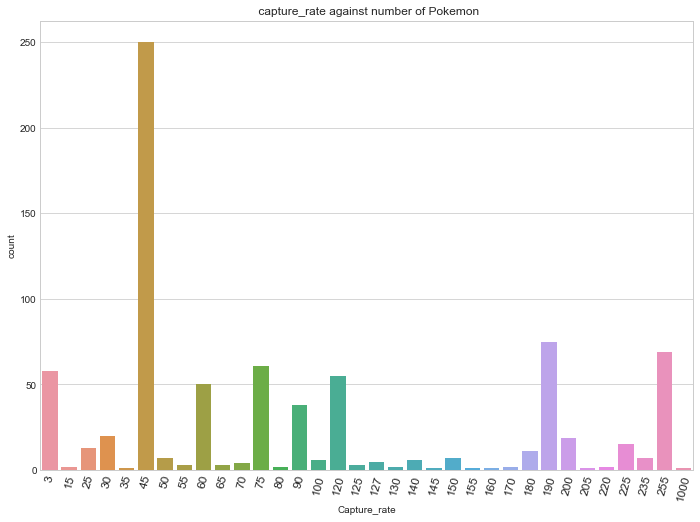

In [146]:
yy = pd.value_counts(df_pokemon['capture_rate'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=yy.index, y=yy, data=df_pokemon)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Capture_rate', ylabel='count')
ax.set_title(' capture_rate against number of Pokemon')

### Abilities

In [28]:
df_pokemon['abilities'].nunique()

482

In [29]:
df_pokemon['abilities'].head(20).unique()

array(["['Overgrow', 'Chlorophyll']", "['Blaze', 'Solar Power']",
       "['Torrent', 'Rain Dish']", "['Shield Dust', 'Run Away']",
       "['Shed Skin']", "['Compoundeyes', 'Tinted Lens']",
       "['Swarm', 'Sniper']", "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
       "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']"],
      dtype=object)

#### 포켓몬 도감번호 

In [30]:
df_pokemon['pokedex_number'].describe()

count    801.000000
mean     401.000000
std      231.373075
min        1.000000
25%      201.000000
50%      401.000000
75%      601.000000
max      801.000000
Name: pokedex_number, dtype: float64

### Height and Weight

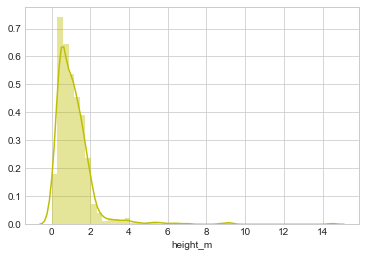

In [77]:
ax_height = sns.distplot(df_pokemon['height_m'], color="y")

In [33]:
print('키가 가장 큰 포켓몬 : {}'.format(df_pokemon.name[df_pokemon['height_m'].idxmax()] )) # 고래포켓몬(고래왕)
print('키가 가장 작은 포켓몬 : {}'.format(df_pokemon.name[df_pokemon['height_m'].idxmin()] )) # 꼬렛

키가 가장 큰 포켓몬 : Wailord
키가 가장 작은 포켓몬 : Rattata


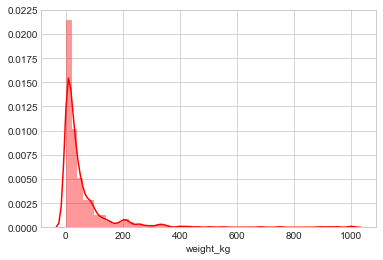

In [78]:
ax_weight = sns.distplot(df_pokemon['weight_kg'], color="r")

In [34]:
print(' 가장 무거운 포켓몬 : {}'.format(df_pokemon.name[df_pokemon['weight_kg'].idxmax()] )) # 7세대 번데기 전설포켓몬 (코스몽)
print( '가장 가벼운 포켓몬 : {}'.format(df_pokemon.name[df_pokemon['weight_kg'].idxmin()] )) # 꼬렛

 가장 무거운 포켓몬 : Cosmoem
가장 가벼운 포켓몬 : Rattata


##### base_egg_step : 포켓몬 알을 부화하는데 필요한 걸음걸이 

In [35]:
df_pokemon['base_egg_steps'].nunique()#10개의 값이 만들어짐

10

In [38]:
df_pokemon['base_egg_steps'].head(20).unique()

array([5120, 3840], dtype=int64)

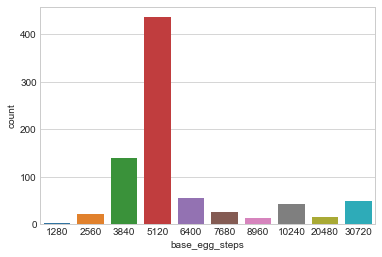

In [39]:
ax = sns.countplot(df_pokemon['base_egg_steps'])

In [40]:
print('존나 걸어야 알 부화 가능한 포켓 : {}'.format(df_pokemon.name[df_pokemon['base_egg_steps'].idxmax()] )) # 뮤츠
print('조금만 걸어도 알 부화 가능한 포켓 : {}'.format(df_pokemon.name[df_pokemon['base_egg_steps'].idxmin()] )) # 잉어킹

존나 걸어야 알 부화 가능한 포켓 : Mewtwo
조금만 걸어도 알 부화 가능한 포켓 : Magikarp


#### experience_growth (포켓몬 경험치 ) 
###### The Experience Growth of the Pokemon (포켓몬이 성장하는데 필요한 경험치)



In [84]:
df_pokemon['experience_growth'].nunique()

6

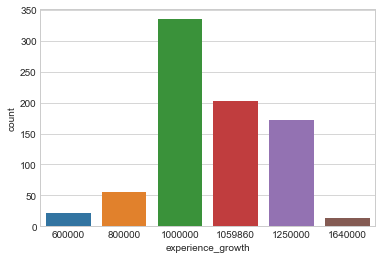

In [41]:
ax = sns.countplot(df_pokemon['experience_growth'])

In [ ]:
# We can see which primary type Pokemon has maximum experience growth.
# Understand correlation between egg steps and experience. To be done in Data Analysis section.


In [42]:
print('경험치 높은 포켓몬 : {}'.format(df_pokemon.name[df_pokemon['experience_growth'].idxmax()] )) # 삐삐
print('경험치 낮은 포켓몬 : {}'.format(df_pokemon.name[df_pokemon['experience_growth'].idxmin()] )) # 뮤츠

경험치 높은 포켓몬 : Shroomish
경험치 낮은 포켓몬 : Nincada


### base_happiness (포켓몬의 기초 친밀도)
#### Base Happiness of the Pokemon.

#### 포켓몬의 진화조건이나 특정기술의 위력의 영향을 미침

In [43]:
df_pokemon['base_happiness'].nunique()

6

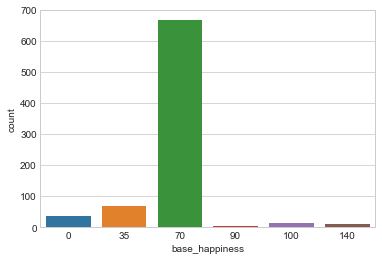

In [44]:
ax = sns.countplot(df_pokemon['base_happiness'])

In [ ]:
# We can see whether this decides their level of strength or not.

In [45]:
print('긍정적인 포켓몬 : {}'.format(df_pokemon.name[df_pokemon['base_happiness'].idxmax()] )) # 삐삐
print('부정적인 포켓몬 : {}'.format(df_pokemon.name[df_pokemon['base_happiness'].idxmin()] )) # 뮤츠

긍정적인 포켓몬 : Clefairy
부정적인 포켓몬 : Mewtwo


# hp (체력)
### The Base HP of the Pokemon

In [46]:
df_pokemon['hp'].nunique()

99

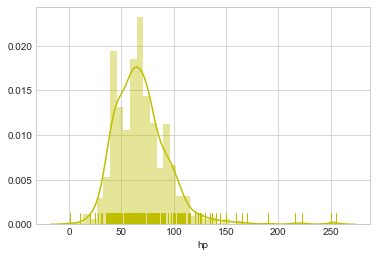

In [55]:
ax = sns.distplot(df_pokemon['hp'], color= 'y',rug=True, hist=True)

In [48]:
print('체력이 가장 좋은 포켓몬 : {}'.format(df_pokemon.name[df_pokemon['hp'].idxmax()] )) #해피너스 진화형
print('체력이 가장  약한 포켓몬: {}'.format(df_pokemon.name[df_pokemon['hp'].idxmin()] )) #단데기 날개달린애

체력이 가장 좋은 포켓몬 : Blissey
체력이 가장  약한 포켓몬: Shedinja


### base_ total

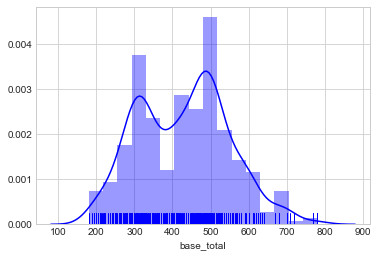

In [54]:
ax = sns.distplot(df_pokemon['base_total'], color='b',rug=True, hist=True)

In [70]:
print('base_totalmax : {}'.format(df_pokemon.name[df_pokemon['hp'].idxmax()] ))
print('base_totalmin: {}'.format(df_pokemon.name[df_pokemon['hp'].idxmin()] )) 

base_totalmax : Blissey
base_totalmin: Shedinja


In [90]:
# level of strength,
# depth in attack
# resistance to other attacks.

## attack and defense 

In [52]:
print(df_pokemon['attack'].nunique())
print(df_pokemon['defense'].nunique())

114
109


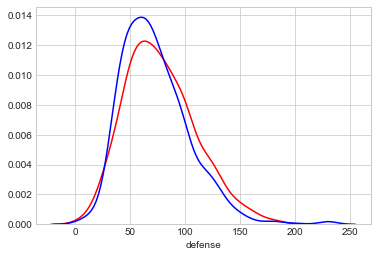

In [53]:
ax_attack = sns.distplot(df_pokemon['attack'], color="r", hist=False)
ax_defense = sns.distplot(df_pokemon['defense'], color="b", hist=False)

In [93]:
# 파란색이 공격
# 빨간색이 방어력

In [56]:
print('기본공격 가장 강한 포켓몬: {}'.format(df_pokemon.name[df_pokemon['attack'].idxmax()] ))#헤라클로스 
print('물리 공격 가장 약한 포켓몬: {}'.format(df_pokemon.name[df_pokemon['attack'].idxmin()] )) #해피너스임 ㅋㅋㅋㅋ

기본공격 가장 강한 포켓몬: Heracross
물리 공격 가장 약한 포켓몬: Chansey


In [57]:
print('기본 방어 가장 좋은 포케몬: {}'.format(df_pokemon.name[df_pokemon['defense'].idxmax()] )) #강철톤
print(' 물리 방어  가장 약한 포켓몬: {}'.format(df_pokemon.name[df_pokemon['defense'].idxmin()] )) #해피너스

기본 방어 가장 좋은 포케몬: Steelix
 물리 방어  가장 약한 포켓몬: Chansey


## sp_attack and sp_defense 

In [60]:
print(df_pokemon['sp_attack'].nunique())
print(df_pokemon['sp_defense'].nunique())

111
97


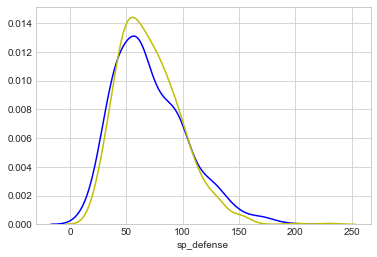

In [64]:
ax_attack = sns.distplot(df_pokemon['sp_attack'], color="b", hist=False)
ax_defense = sns.distplot(df_pokemon['sp_defense'], color="y", hist=False)

In [65]:
print('스폐셜 공격 가장 강한 포켓몬: {}'.format(df_pokemon.name[df_pokemon['sp_attack'].idxmax()] ))
print('스폐셜 공격 가장 약한 포켓몬: {}'.format(df_pokemon.name[df_pokemon['sp_attack'].idxmin()] ))

스폐셜 공격 가장 강한 포켓몬: Mewtwo
스폐셜 공격 가장 약한 포켓몬: Sandshrew


In [66]:
print('스폐셜 방어 좋은 포켓몬: {}'.format(df_pokemon.name[df_pokemon['sp_defense'].idxmax()] ))
print('스폐셜 방어  약한 포켓몬: {}'.format(df_pokemon.name[df_pokemon['sp_defense'].idxmin()] ))

스폐셜 방어 좋은 포켓몬: Shuckle
스폐셜 방어  약한 포켓몬: Caterpie


## against_


In [67]:
cols = df_pokemon.columns
against_ = []
for col in cols:
    if ('against_' in str(col)):
        against_.append(col)
        
print(len(against_)) 
print(against_)

18
['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']


In [70]:
#18가지의 against 속성

In [69]:
unique_elem = []
for col in against_:
    unique_elem.append(df_pokemon[col].unique().tolist())
    
result = set(x for l in unique_elem for x in l)

result = list(result)
print(result)

[0.5, 1.0, 2.0, 0.25, 4.0, 0.0]


In [71]:
for col in against_:
    if (np.mean(df_pokemon[col]) > 1.2):
        print(col)

for col in against_:
    if (np.sum(df_pokemon[col]) > 1000):
        print(col)      

against_ice
against_rock
against_rock


In [ ]:
# 대부분 포켓몬이 ice 와 rock 공격 받을 때 약함.

against_bug
[1.   0.5  0.25 2.   4.  ]


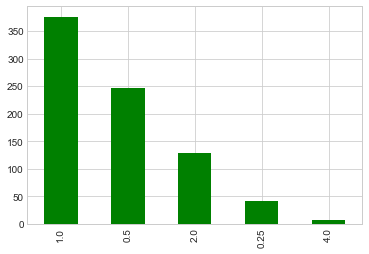

against_dark
[1.   0.5  2.   0.25 4.  ]


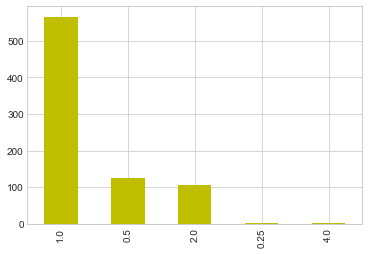

against_dragon
[1.  0.  0.5 2. ]


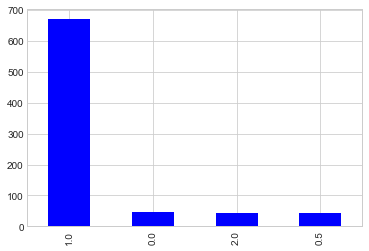

against_electric
[0.5  1.   2.   0.   4.   0.25]


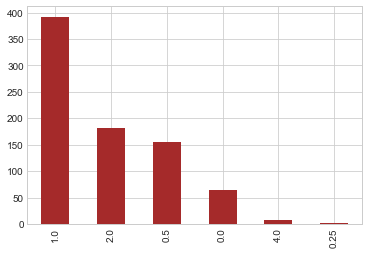

against_fairy
[0.5  1.   2.   0.25 4.  ]


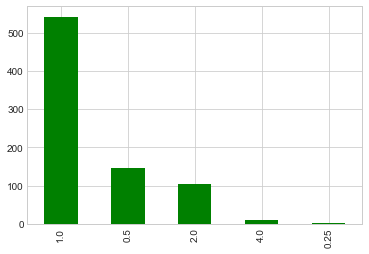

against_fight
[0.5  1.   0.25 2.   0.   4.  ]


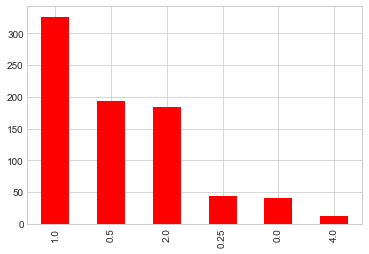

against_fire
[2.   0.5  1.   4.   0.25]


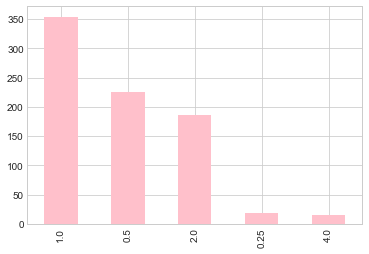

against_flying
[2.   1.   0.5  4.   0.25]


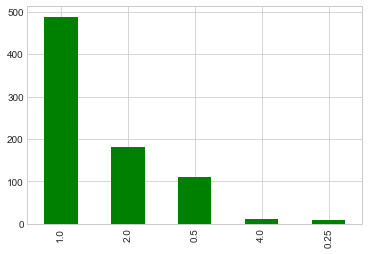

against_ghost
[1.  0.  2.  0.5 4. ]


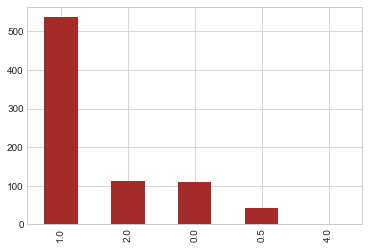

against_grass
[0.25 0.5  2.   1.   4.  ]


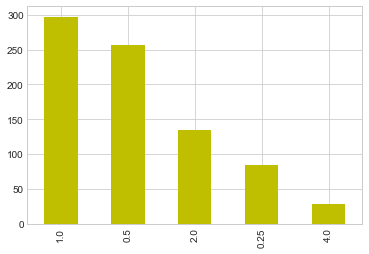

against_ground
[1.   2.   0.   0.5  0.25 4.  ]


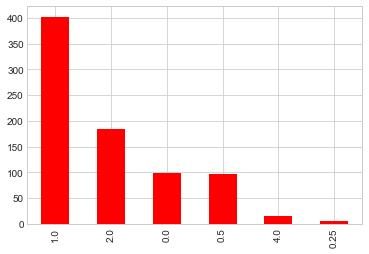

against_ice
[2.   0.5  1.   0.25 4.  ]


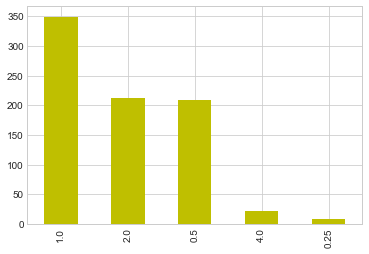

against_normal
[1.   0.5  0.   0.25]


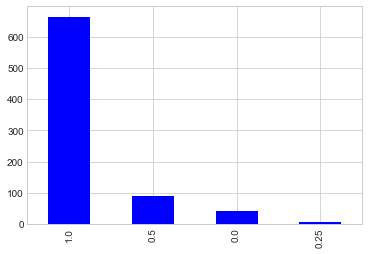

against_poison
[1.   0.5  0.25 2.   0.   4.  ]


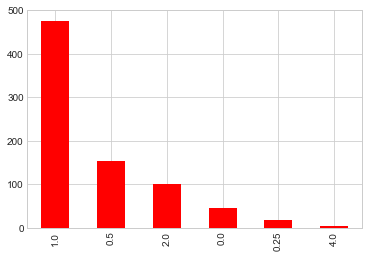

against_psychic
[2.   1.   0.5  0.   0.25 4.  ]


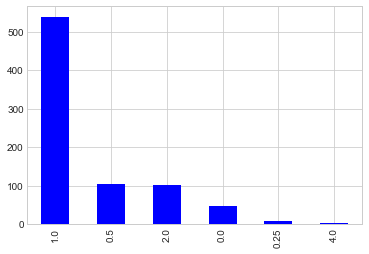

against_rock
[1.   2.   4.   0.5  0.25]


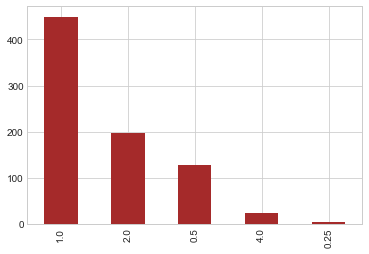

against_steel
[1.   0.5  2.   0.25 4.  ]


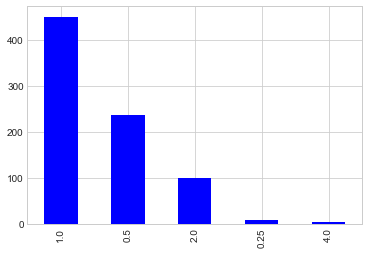

against_water
[0.5  2.   1.   4.   0.25]


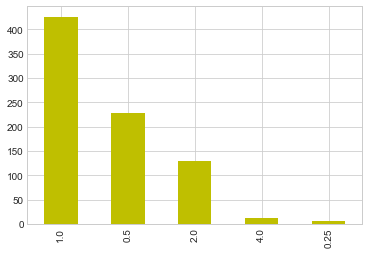

In [73]:
import random

for col in range(0, len(against_)):
    print (against_[col])
    print (df_pokemon[against_[col]].unique())
    pp = pd.value_counts(df_pokemon[against_[col]])
    
    color = ['b', 'r', 'pink', 'green', 'pink', 'y', 'brown']
            
    pp.plot.bar(color = random.choice(color))
    plt.show()

## speed

In [74]:
print(df_pokemon['speed'].nunique())

113


In [75]:
df_pokemon['speed'].describe()

count    801.000000
mean      66.334582
std       28.907662
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      180.000000
Name: speed, dtype: float64

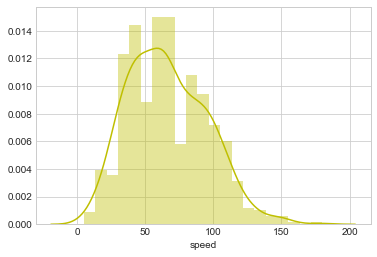

In [76]:
ax_height = sns.distplot(df_pokemon['speed'], color="y")

In [117]:
print('Fastest Pokemon: {}'.format(df_pokemon.name[df_pokemon['speed'].idxmax()] ))
print('Slowest Pokemon: {}'.format(df_pokemon.name[df_pokemon['speed'].idxmin()] ))

Fastest Pokemon: Deoxys
Slowest Pokemon: Shuckle


Text(0.5,1,'Pokemon for different Speed levels')

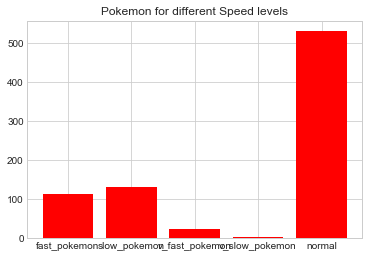

In [136]:
speed_statistics = df_pokemon['speed'].describe()

mean = speed_statistics[1]
standard_dev = speed_statistics[2]

#--- Create lists for the four categories mentioned ---
fast_pokemon = []
slow_pokemon = []
v_fast_pokemon = []
v_slow_pokemon = []
normal = []

for i in range(0, len(df_pokemon)):
    if(df_pokemon.speed[i] > mean + (2 * standard_dev)):
        v_fast_pokemon.append(df_pokemon.name[i])
    elif(df_pokemon.speed[i] < mean - (2 * standard_dev)):
        v_slow_pokemon.append(df_pokemon.name[i])
    elif(df_pokemon.speed[i] > mean + standard_dev):
        fast_pokemon.append(df_pokemon.name[i])
    elif(df_pokemon.speed[i] < mean - standard_dev):
        slow_pokemon.append(df_pokemon.name[i])
    else:
        normal.append(df_pokemon.name[i])
    
speed_levels = ['fast_pokemon','slow_pokemon','v_fast_pokemon','v_slow_pokemon','normal']
speed_count = [len(fast_pokemon), len(slow_pokemon), len(v_fast_pokemon),len(v_slow_pokemon),len(normal)]

xlocations = np.array(range(len(speed_count)))
width = 0
plt.bar(xlocations, speed_count, color = 'r')
plt.xticks(xlocations+ width, speed_levels)
#xlim(0, xlocations[-1]+width*2)
plt.title("Pokemon for different Speed levels")

## generationmon was first introduceds

In [79]:
df_pokemon['generation'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64

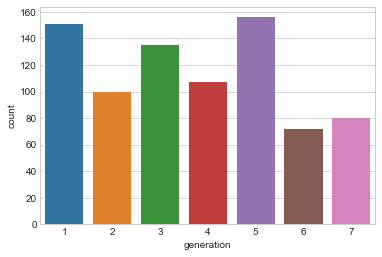

In [78]:
ax = sns.countplot(x="generation", data=df_pokemon)

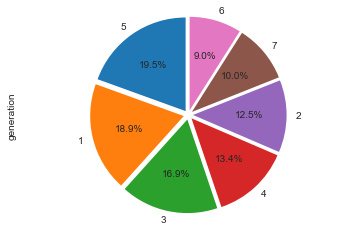

In [80]:
pp = pd.value_counts(df_pokemon.generation)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.axis('equal')
plt.show()

## is_legendary

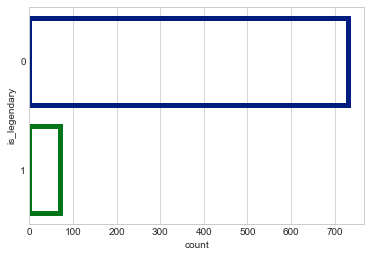

In [81]:
ax = sns.countplot(y=df_pokemon['is_legendary'], data=df_pokemon, facecolor=(0, 0, 0, 0),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 3))

In [82]:
df_pokemon['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

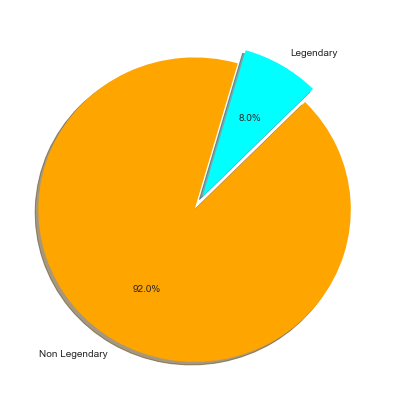

In [118]:
fig = plt.figure(figsize=(7,7))

colours = ["aqua", "orange"]
pokeLeg = df_pokemon[df_pokemon['is_legendary']==True]
pokeNon = df_pokemon[df_pokemon['is_legendary']==False]

legDist = [pokeLeg['name'].count(),df_pokemon['name'].count()]
legPie = plt.pie(legDist,
                 labels= ['Legendary', 'Non Legendary'], 
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors=colours,
                 startangle = 45,
                 explode=(0, 0.1))

## 상세한 데이터 분석

### base_total과 against 속성값 상관관계

In [100]:
corr = df_pokemon[['base_total','against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water']].corr()
print (corr)

                  base_total  against_bug  against_dark  against_dragon  \
base_total          1.000000    -0.012398      0.065446        0.069766   
against_bug        -0.012398     1.000000      0.230107        0.165430   
against_dark        0.065446     0.230107      1.000000        0.140830   
against_dragon      0.069766     0.165430      0.140830        1.000000   
against_electric   -0.017137    -0.246943     -0.015830       -0.108928   
against_fairy       0.098948     0.239566     -0.301354        0.439705   
against_fight       0.048629     0.137902     -0.357981        0.035237   
against_fire       -0.061698     0.202778      0.010527       -0.261570   
against_flying     -0.106586     0.183343     -0.179697        0.064850   
against_ghost       0.114179     0.129174      0.672337       -0.049941   
against_grass      -0.017340     0.079197     -0.006533       -0.037135   
against_ground      0.064252    -0.186841     -0.007660       -0.120042   
against_ice         0.021

In [101]:
corr = df_pokemon[['base_total','attack','base_egg_steps','base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary']].corr()
print (corr)

                   base_total    attack  base_egg_steps  base_happiness  \
base_total           1.000000  0.730134        0.496466       -0.274795   
attack               0.730134  1.000000        0.331088       -0.251811   
base_egg_steps       0.496466  0.331088        1.000000       -0.524551   
base_happiness      -0.274795 -0.251811       -0.524551        1.000000   
base_total           1.000000  0.730134        0.496466       -0.274795   
defense              0.629620  0.468915        0.265230       -0.191503   
experience_growth    0.256930  0.241087        0.373837       -0.295348   
height_m             0.525483  0.407390        0.377565       -0.346041   
hp                   0.620624  0.410616        0.359218       -0.108217   
percentage_male     -0.210969 -0.028367       -0.440658        0.259529   
pokedex_number       0.140363  0.137633        0.197278       -0.154776   
sp_attack            0.741120  0.368154        0.404477       -0.228924   
sp_defense           0.71

###### base_total과의 40개의 변수 관계 분석

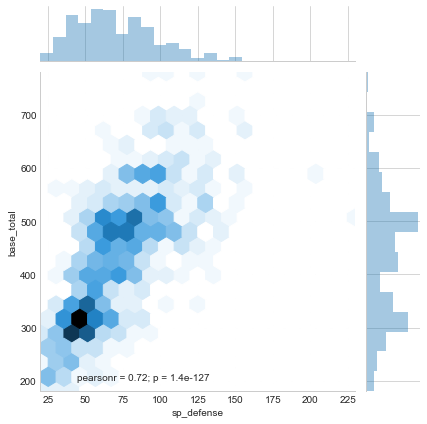

In [87]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='sp_defense', y='base_total', data=df_pokemon, kind='hex')

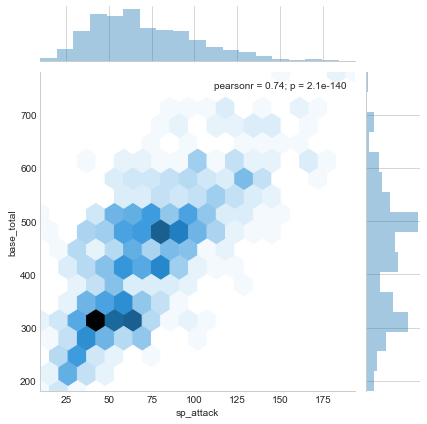

In [88]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='sp_attack', y='base_total', data=df_pokemon, kind='hex')

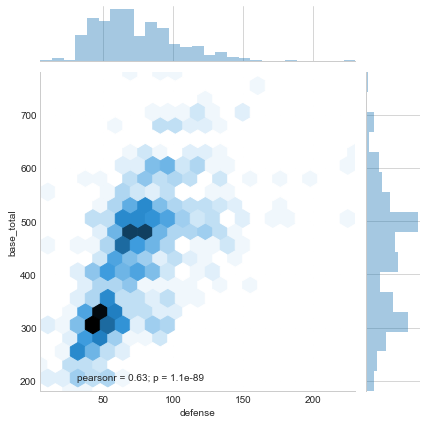

In [89]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='defense', y='base_total', data=df_pokemon, kind='hex')

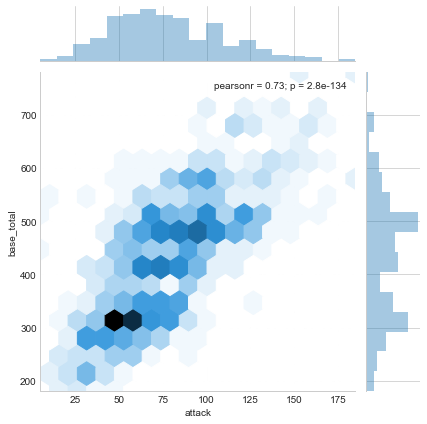

In [91]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='attack', y='base_total', data=df_pokemon, kind='hex')

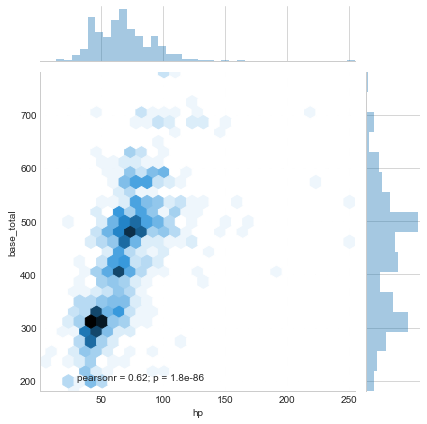

In [92]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='hp', y='base_total', data=df_pokemon, kind='hex')

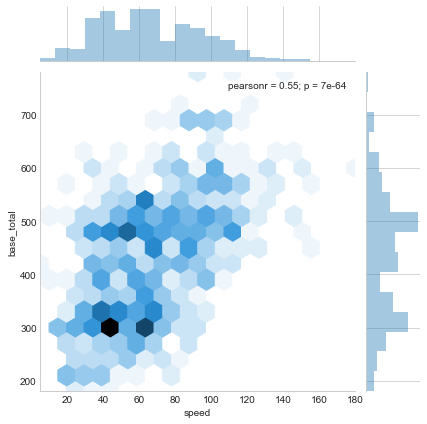

In [93]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='speed', y='base_total', data=df_pokemon, kind='hex')

In [107]:
x = df_pokemon[['attack','hp','speed','sp_attack', 'sp_defense','defense']]
y= df_pokemon[['base_total']]

import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = y, exog = x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.542e+32
Date:                Sun, 29 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:56:58   Log-Likelihood:                 22039.
No. Observations:                 801   AIC:                        -4.407e+04
Df Residuals:                     795   BIC:                        -4.404e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attack         1.0000   3.99e-16    2.5e+15      0.000       1.000       1.000
hp             1.0000   3.97e-16   2.52e+15      0.000       1.000       1.000
speed          1.0000   3.67e-16   2.72e+15      0.000       1.000       1.000
sp_attack      1.0000   3.88e-16   2.57e+15      0.000       1.000       1.000
sp_defense     1.0000   4.74e-16   2.11e+15      0.000       1.000       1.000
defense        1.0000   4.08e-16   2.45e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      101.834   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.425
Skew:                          -0.823   Prob(JB):                     9.83e-38
Kurtosis:                       4.548   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=3)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
accuracy = regressor.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 100%'

##### base total의  R-square 값이 100%일치 

In [105]:
x = df_pokemon[['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water',]]

y= df_pokemon[['base_total']]

import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = y, exog = x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_total   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     581.4
Date:                Sun, 29 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:56:34   Log-Likelihood:                -4953.2
No. Observations:                 801   AIC:                             9942.
Df Residuals:                     783   BIC:                         1.003e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
against_bug        -31.7369     13.347     -2.378      0.018     -57.937      -5.537
against_dark        51.0683     17.022      3.000      0.003      17.655      84.481
against_dragon      13.9972     26.659      0.525      0.600     -38.334      66.328
against_electric    40.0971     10.235      3.918      0.000      20.006      60.188
against_fairy       62.7969     14.106      4.452      0.000      35.106      90.488
against_fight       38.4790     11.901      3.233      0.001      15.117      61.841
against_fire        37.1792     10.964      3.391      0.001      15.657      58.702
against_flying     -24.4087     15.134     -1.613      0.107     -54.117       5.299
against_ghost       54.9063     14.975      3.666      0.000      25.510      84.303
against_grass       -0.2692      7.176     -0.038      0.970     -14.357      13.818
against_ground      33.8383     10.172      3.326      0.001      13.870      53.807
against_ice         29.2911      8.795      3.330      0.001      12.026      46.556
against_normal      60.7036     22.115      2.745      0.006      17.293     104.114
against_poison      28.6060     13.913      2.056      0.040       1.294      55.918
against_psychic      7.0007     16.785      0.417      0.677     -25.948      39.949
against_rock        -1.0240     11.870     -0.086      0.931     -24.325      22.277
against_steel      -11.9786     12.747     -0.940      0.348     -37.001      13.044
against_water       23.3512     11.650      2.004      0.045       0.482      46.221
==============================================================================
Omnibus:                       29.195   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.886
Skew:                           0.125   Prob(JB):                     0.000586
Kurtosis:                       2.381   Cond. No.                         37.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### base_total과 against 18가지 속성 비교결과 그리 연관있어 보이지 않음

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=3)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
accuracy = regressor.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: -6%'

#### against 간의 속성 비교

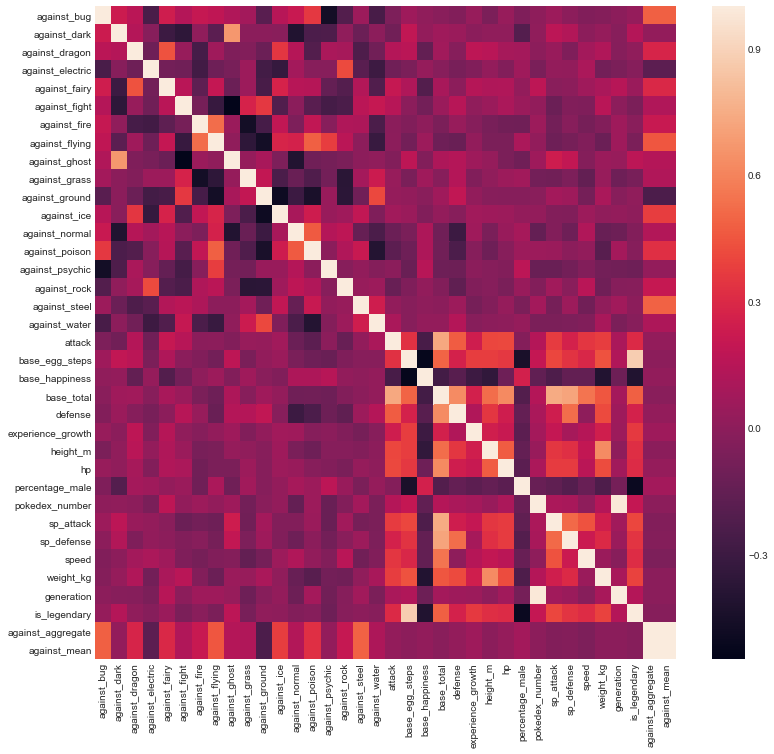

In [109]:
numeric_clmns = df_pokemon.dtypes[df_pokemon.dtypes != "object"].index 

f, ax = plt.subplots(figsize=(13, 12))
corr = df_pokemon[numeric_clmns].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

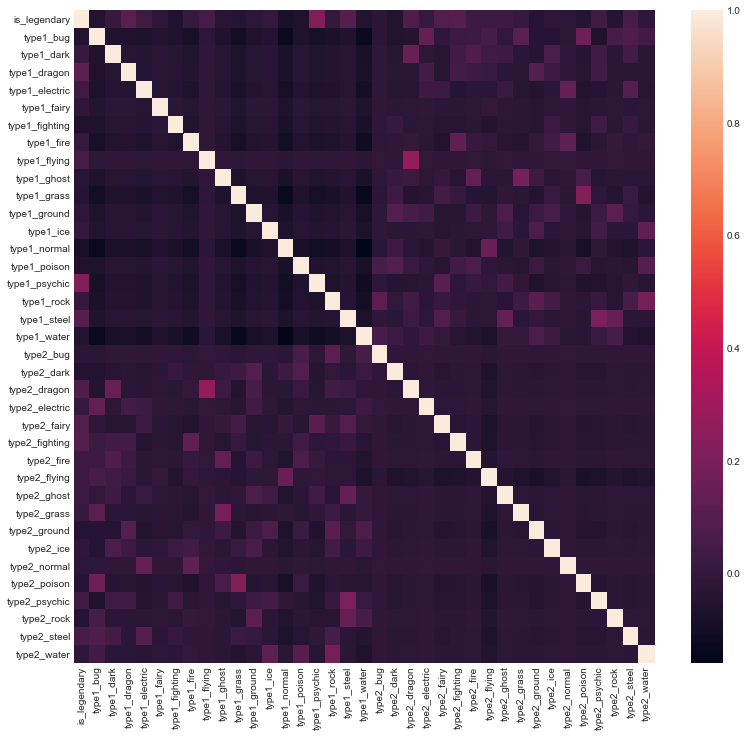

In [111]:
sd = df_pokemon[['type1', 'type2', 'is_legendary']]
md = pd.get_dummies(sd)

corr = md.corr()
f, ax = plt.subplots(figsize=(13, 12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

###### type과 레전드 포켓몬간의 연관은 크게 없어 보인다.

### base_egg_steps 와 experience_growth 관계

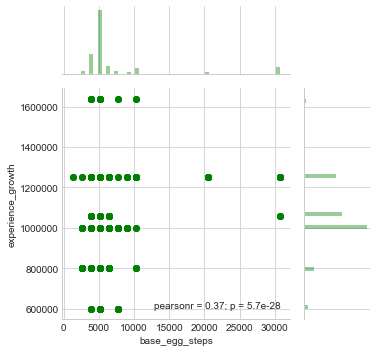

In [90]:
g = sns.jointplot("base_egg_steps", "experience_growth", data=df_pokemon, size=5, ratio=3, color="g")

### 알을 부화하는데 걸음걸이와 전설의 포켓몬이냐의 관계와 연관관계가 높다

In [115]:
df_pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'against_aggregate', 'against_mean'],
      dtype='object')

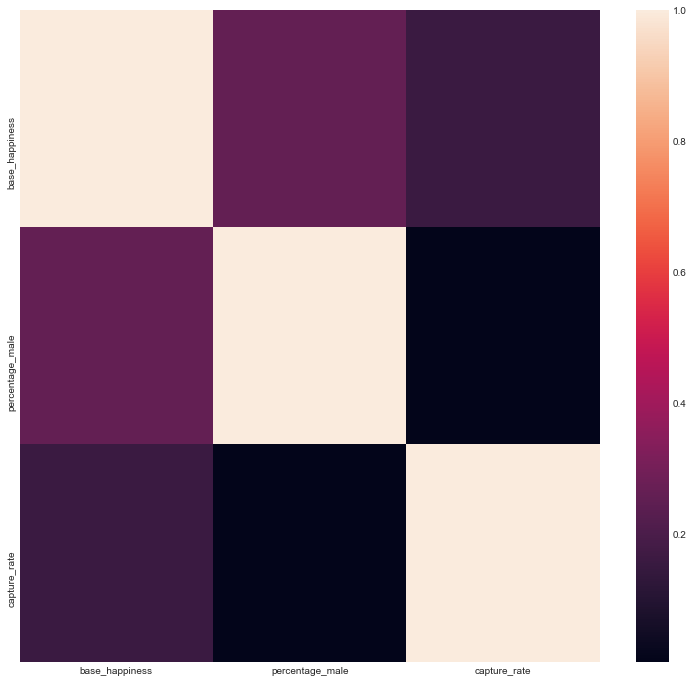

In [116]:
sd = df_pokemon[['base_happiness', 'percentage_male', 'capture_rate']]
md = pd.get_dummies(sd)

corr = md.corr()
f, ax = plt.subplots(figsize=(13, 12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [117]:
#친밀도와 , 성별비중 그리고 포획률은 음의 상관관계

## 상관분석 (base_total과의 관계)

 세대가 거늡날수록 레전드 포켓몬이 많이 나옴

In [156]:
df_pokemon['type1_&_type2'].value_counts().reset_index(name="count").query("count > 10")["index"]

0           normal 
1            water 
2            grass 
3          psychic 
4             fire 
5         electric 
6     normal flying
7         fighting 
8              bug 
9            fairy 
10     grass poison
11       bug flying
12          poison 
13          dragon 
14             ice 
15            rock 
16       bug poison
Name: index, dtype: object

In [157]:
df_pokemon['new_type1_&_type2'], _ = pd.factorize(df_pokemon['type1_&_type2'])
corr = df_pokemon[['new_type1_&_type2', 'is_legendary']].corr()
print(corr)

                   new_type1_&_type2  is_legendary
new_type1_&_type2           1.000000      0.160708
is_legendary                0.160708      1.000000


In [158]:
#레전드와 타입은 관계가 전혀 없네요...

In [162]:
corr = df_pokemon[['height_m', 'total_points']].corr()
print(corr)

              height_m  total_points
height_m      1.000000      0.525483
total_points  0.525483      1.000000


In [161]:
df_pokemon['total_points']=df_pokemon['hp']+df_pokemon['attack']+df_pokemon['defense']+df_pokemon['speed']+df_pokemon['sp_attack']+df_pokemon['sp_defense']

## 다른 공격에 가장 취약한 포켓몬 찾기

Creating additional columns called against_aggregate and against_mean:

In [83]:
df_pokemon['against_aggregate'] = df_pokemon[against_].sum(axis=1)
df_pokemon['against_mean'] = df_pokemon[against_].mean(axis=1)
df_pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,against_aggregate,against_mean
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,65,65,45,grass,poison,6.9,1,0,19.25,1.069444
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,80,60,grass,poison,13.0,1,0,19.25,1.069444
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,122,120,80,grass,poison,100.0,1,0,19.25,1.069444
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,60,50,65,fire,NaN,8.5,1,0,18.00,1.000000
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,80,65,80,fire,NaN,19.0,1,0,18.00,1.000000


In [84]:
# manual selection based on chart above
d = {'type에 따른 공격효과가 좋은 포켓몬 분석결과':['bug','dark','dragon','electric','fairy','fighting','fire','flying','ghost','grass','ground','ice','normal','poison',
                        'psychic','rock','steel','water'],
     'type1':['rock','fairy','ice','ground','steel','fairy','water','ice','ghost','fire','ice','rock','fighting','psychic','ghost','grass',
                   'ground','grass'],
     'type2':['fire','fighting','fairy',' ','poison','flying','rock','rock','dark','ice','water','steel',' ','ground','dark','water',
                   'fire','electric'],
     'type3':['flying','bug','dragon',' ',' ','psychic','ground','electric',' ','flying','grass','fire',' ',' ','bug','steel',
                   'fighting',' ']}

print('Top 3 best pokemon selection against specific pokemon type')
pd.DataFrame(d)

Top 3 best pokemon selection against specific pokemon type


,type1,type2,type3,type에 따른 공격효과가 좋은 포켓몬 분석결과
0,rock,fire,flying,bug
1,fairy,fighting,bug,dark
2,ice,fairy,dragon,dragon
3,ground,,,electric
4,steel,poison,,fairy
5,fairy,flying,psychic,fighting
6,water,rock,ground,fire
7,ice,rock,electric,flying
8,ghost,dark,,ghost
9,fire,ice,flying,grass


In [168]:
df_pokemon.name[df_pokemon['against_aggregate'].idxmax()]
df_pokemon.name[df_pokemon['against_aggregate'].idxmin()]

'Mawile'

In [ ]:
# 어느 공격유형에 상관 없는 녀석인듯....

In [169]:
against_unique = df_pokemon['against_aggregate'].unique().tolist()
weak = min(against_unique)
strong = max(against_unique)

print ('Strong Pokemon')
print (df_pokemon.name[df_pokemon['against_aggregate'] == strong])
print ('Weak Pokemon')
print (df_pokemon.name[df_pokemon['against_aggregate'] == weak])

Strong Pokemon
697     Amaura
698    Aurorus
Name: name, dtype: object
Weak Pokemon
302      Mawile
706      Klefki
800    Magearna
Name: name, dtype: object


In [170]:
corr = df_pokemon[['against_mean', 'is_legendary']].corr()
print(corr)

              against_mean  is_legendary
against_mean       1.00000      -0.02166
is_legendary      -0.02166       1.00000


###  레전드 포켓몬은 against와 음의 상관관계를 보인다.

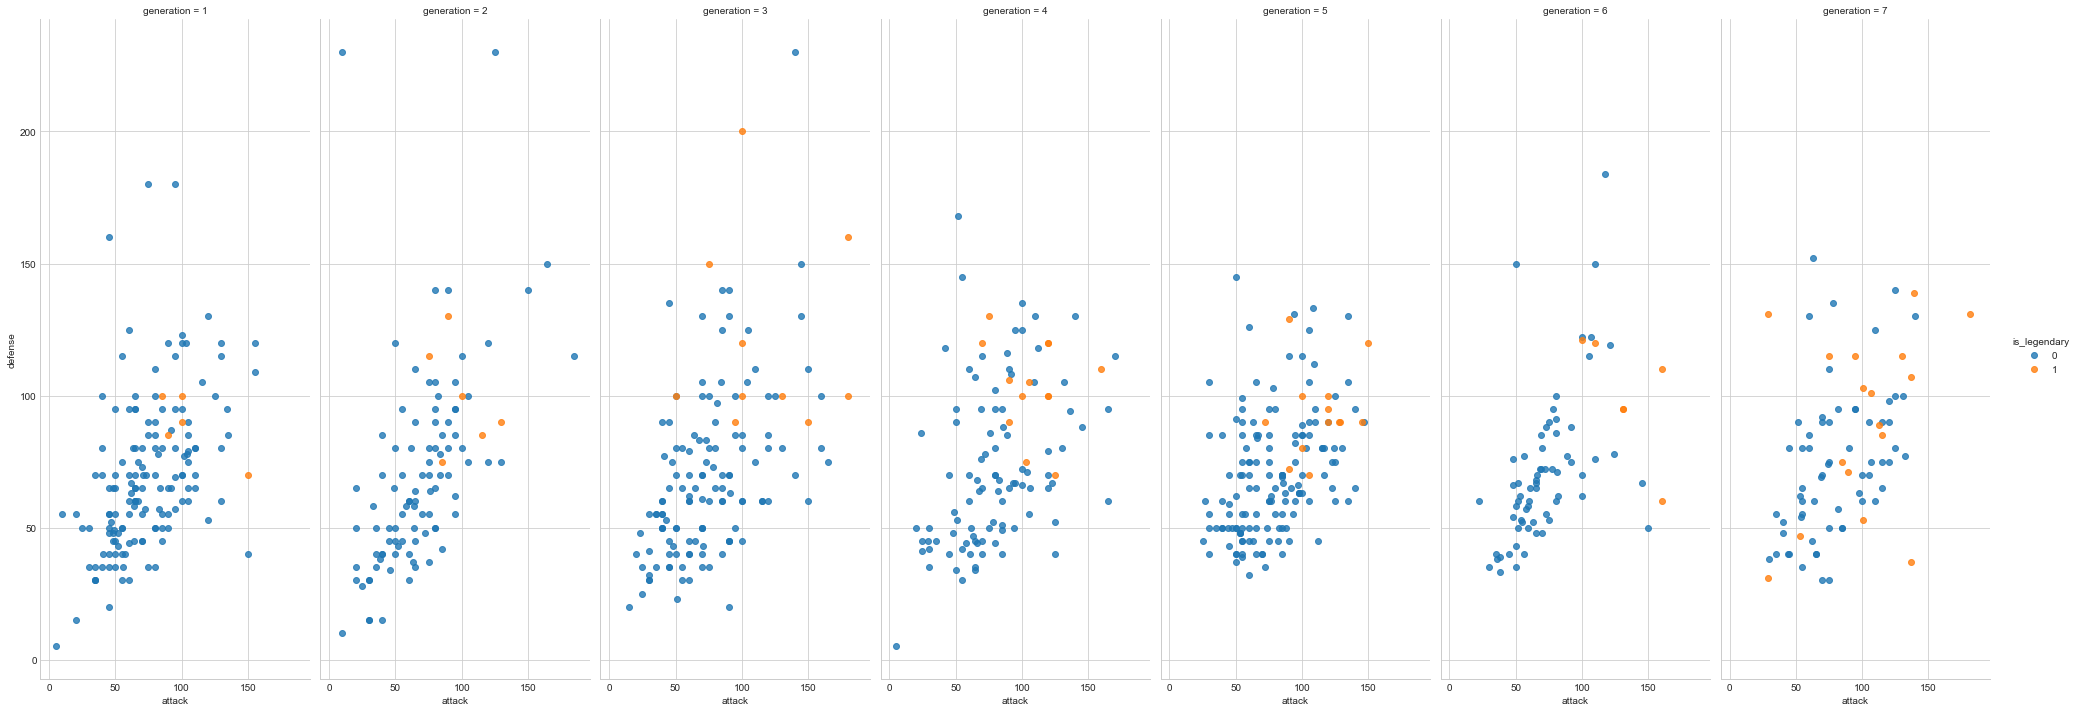

In [120]:
plt.figure(figsize=(20, 6))
sns.set_style('whitegrid')
sns.lmplot(
    x="attack",
    y="defense",
    data=df_pokemon,
    fit_reg=False,
    hue='is_legendary',
    col="generation",
    aspect=0.4,
    size=10)

### 공격봐 방어에 레전드포켓몬과 일반 포켓몬 크게 ...관계는 없어보임

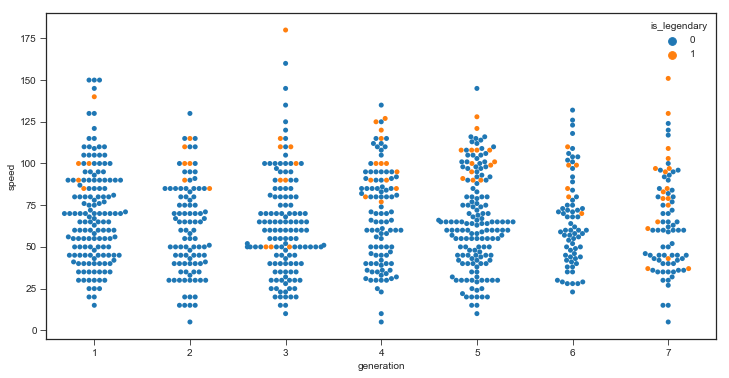

In [16]:
sns.set_style('ticks')
plt.figure(figsize=(12, 6))
sns.swarmplot(x="generation", y="speed", data=df_pokemon, hue='is_legendary')

#### 스피드또한 레전드포켓몬과 일반 포켓몬 크게 ...관계는 없어보임

In [125]:
x = df_pokemon[['percentage_male','base_happiness','experience_growth']]
y= df_pokemon[['is_legendary']]

In [126]:
import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = y, exog = x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           is_legendary   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     202.4
Date:                Sun, 29 Jul 2018   Prob (F-statistic):           1.28e-97
Time:                        15:17:18   Log-Likelihood:                 66.249
No. Observations:                 801   AIC:                            -126.5
Df Residuals:                     798   BIC:                            -112.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
percentage_male      -0.0042      0.000    -13.670      0.000      -0.005      -0.004
base_happiness       -0.0031      0.000     -8.751      0.000      -0.004      -0.002
experience_growth  4.652e-07   2.12e-08     21.931      0.000    4.24e-07    5.07e-07
==============================================================================
Omnibus:                      299.786   Durbin-Watson:                   0.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1252.375
Skew:                           1.717   Prob(JB):                    1.12e-272
Kurtosis:                       8.073   Cond. No.                     5.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=3)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
accuracy = regressor.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 43%'

In [130]:
corr = df_pokemon[['is_legendary', 'base_egg_steps','base_happiness','percentage_male']].corr()
print(corr)

                 is_legendary  base_egg_steps  base_happiness  percentage_male
is_legendary         1.000000        0.873488       -0.413108        -0.500657
base_egg_steps       0.873488        1.000000       -0.524551        -0.440658
base_happiness      -0.413108       -0.524551        1.000000         0.259529
percentage_male     -0.500657       -0.440658        0.259529         1.000000


### base_egg_stpes 와 레전드 포켓몬만 영향만 있다.